In [23]:
import sys; sys.path.append('../../wwa/'); from wwa import *

# region for West Africa time series analysis
xn,xx,yn,yx = [-16,20,10,17]
box_str = "_".join([str(i) for i in [xn,xx,yn,yx]])

In [24]:
def synth_plot(df, ax = None, logged = False):
    
    if not ax: fig, ax = plt.subplots(dpi = 100)
    
    gcols = {"obs" : "blue", 
         "obs_synth" : "blue", 
         "models" : "red", 
         "model_synth" : "red",
         "synth" : "magenta"}
    
    for k in range(len(df)):

        r = df.iloc[k]
        ax.add_patch(Rectangle((r.lower,-k-0.4), r.upper - r.lower, 0.8, facecolor = gcols[r.name], alpha = 0.5 + 0.5*("synth" in r.name)))
        ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "none", lw = 1.5))

        ax.plot(r.est, -k, color = "k", marker = "v")  

    ax.set_yticks(range(0, -len(df), -1))
    ax.set_yticklabels(df.model)
    
    if logged:
        ax.set_xscale('log')
        ax.axvline(1, ls = "--", color = "k", zorder = -99)
    else:
        ax.axvline(0, ls = "--", color = "k", zorder = -99)

In [27]:
varnm = "tx5x"
region = "mali-bf"

In [30]:
di_attr = pd.read_csv("synth/synth_"+varnm+"-april_"+region+"_dI-attr.csv", index_col = "group")
di_proj = pd.read_csv("synth/synth_"+varnm+"-april_"+region+"_dI-proj.csv", index_col = "group")

# merge to add dummy rows for neater plotting
obs = di_attr.loc[["obs" in x for x in di_attr.index]].copy()
obs.loc[:,["est", "lower", "upper", "l_wb", "u_wb"]] = np.nan
di_proj = pd.concat([obs, di_proj])

pr_proj = pd.read_csv("synth/synth_"+varnm+"-april_"+region+"_PR-proj.csv", index_col = "group")

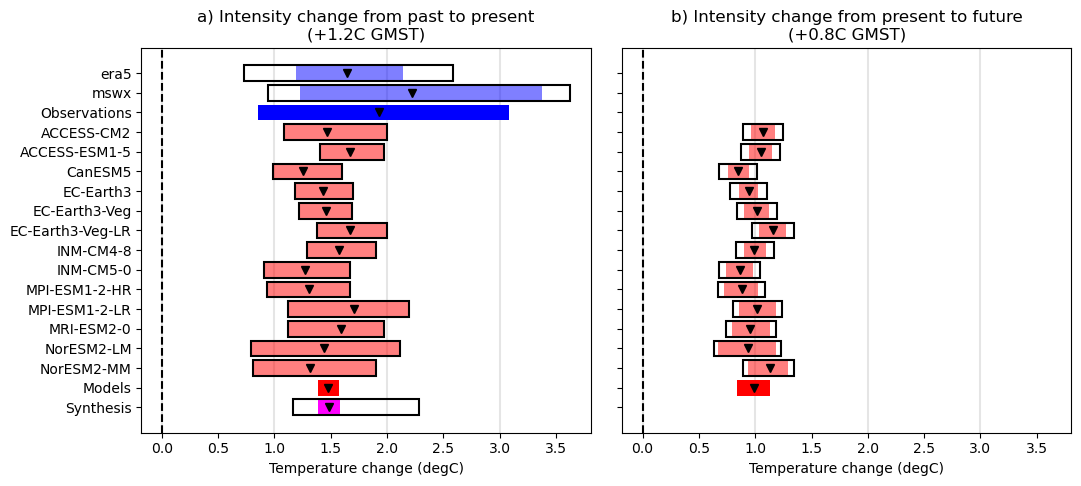

In [31]:
fig, axs = plt.subplots(ncols = 2, sharey = True, sharex = True, figsize = (12,5))
plt.subplots_adjust(wspace = 0.07)

synth_plot(di_proj, ax = axs[1])
synth_plot(di_attr, ax = axs[0])
axs[0].set_title("a) Intensity change from past to present\n(+1.2C GMST)")
axs[1].set_title("b) Intensity change from present to future\n(+0.8C GMST)")

for ax in axs: 
    [ax.axvline(x, color = "k", alpha = 0.1, zorder = -99) for x in range(0,4)]
    ax.set_xlabel("Temperature change (degC)")

plt.savefig("fig/synthesis_dI_"+varnm+"_"+region+".png")

/tmp/ipykernel_28084/505161851.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(x) if x >= 1 else format(x) for x in ax.get_xticks()])


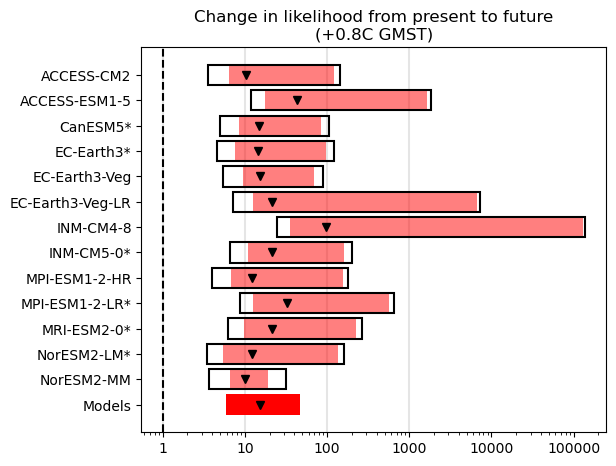

In [32]:
fig, ax = plt.subplots(ncols = 1, sharey = True, sharex = True, figsize = (6,5))
plt.subplots_adjust(wspace = 0.07)

synth_plot(pr_proj, ax = ax, logged = True)
ax.set_title("Change in likelihood from present to future\n(+0.8C GMST)")

[ax.axvline(10**x, color = "k", alpha = 0.1, zorder = -99) for x in range(0,4)]
ax.set_xticklabels([int(x) if x >= 1 else format(x) for x in ax.get_xticks()])

plt.savefig("fig/synthesis_PR_"+varnm+"_"+region+".png")
